In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
# ==========================
# 贷款计算函数
# ==========================
def calc_loan_payment(principal, rate, years):
    monthly_rate = rate / 12
    n = years * 12
    monthly_payment = principal * (monthly_rate * (1 + monthly_rate)**n) / ((1 + monthly_rate)**n - 1)
    return monthly_payment


In [3]:
# ==========================
# 主计算函数
# ==========================
def calculate(car_price, salary, loan_years, loan_rate, lease_years, lease_residual, lease_discount_rate,
              annual_fuel_cost, annual_electric_cost):
    
    # 全款
    cash_total = car_price

    # 贷款
    loan_monthly = calc_loan_payment(car_price, loan_rate, loan_years)
    loan_total = loan_monthly * loan_years * 12

    # Lease
    lease_monthly = (car_price * (1 - lease_residual)) / (lease_years * 12)
    lease_monthly_after_tax = lease_monthly * (1 - lease_discount_rate)
    lease_total = lease_monthly_after_tax * lease_years * 12 + car_price * lease_residual

    # 运行成本
    fuel_total = annual_fuel_cost * loan_years
    electric_total = annual_electric_cost * loan_years

    # ==========================
    # 输出结果
    # ==========================
    clear_output()
    print("=== 买车方式对比 (AUD) ===")
    print(f"全款: {cash_total:,.0f}")
    print(f"贷款 ({loan_years}年, {loan_rate*100:.1f}%): 每月 {loan_monthly:,.0f}, 总支出 {loan_total:,.0f}")
    print(f"Lease ({lease_years}年, 税收优惠 {lease_discount_rate*100:.0f}%): 每月 {lease_monthly_after_tax:,.0f}, 总支出 {lease_total:,.0f}")

    print("\n=== 运行成本对比 ({} 年) ===".format(loan_years))
    print(f"油车油费: {fuel_total:,.0f}")
    print(f"电车电费: {electric_total:,.0f}")

    # ==========================
    # 可视化
    # ==========================
    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    # 车价支付方式对比
    methods = ["Cash", "Loan", "Lease"]
    totals = [cash_total, loan_total, lease_total]
    axes[0].bar(methods, totals, color=['green','blue','orange'])
    axes[0].set_ylabel("Total Cost (AUD)")
    axes[0].set_title("Car Purchase Methods")

    # 油车 vs 电车运行成本
    axes[1].bar(["Fuel Car", "Electric Car"], [fuel_total, electric_total], color=['red','purple'])
    axes[1].set_ylabel("Running Cost (AUD)")
    axes[1].set_title("Fuel vs Electric Cost")

    plt.show()


In [4]:
# ==========================
# 交互控件
# ==========================
car_price_w = widgets.FloatText(value=47000, description="车价 (AUD)")
salary_w = widgets.FloatText(value=185000, description="年薪 (AUD)")
loan_years_w = widgets.IntSlider(value=5, min=1, max=10, description="贷款年限")
loan_rate_w = widgets.FloatSlider(value=6.0, min=1.0, max=10.0, step=0.1, description="利率 (%)")
lease_years_w = widgets.IntSlider(value=5, min=1, max=10, description="Lease年限")
lease_residual_w = widgets.FloatSlider(value=25, min=0, max=50, step=1, description="残值比例 (%)")
lease_discount_rate_w = widgets.FloatSlider(value=30, min=0, max=50, step=1, description="税收优惠 (%)")
annual_fuel_cost_w = widgets.FloatText(value=2500, description="油费/年")
annual_electric_cost_w = widgets.FloatText(value=1000, description="电费/年")

ui = widgets.VBox([
    car_price_w, salary_w, loan_years_w, loan_rate_w,
    lease_years_w, lease_residual_w, lease_discount_rate_w,
    annual_fuel_cost_w, annual_electric_cost_w
])

out = widgets.interactive_output(
    calculate,
    {
        'car_price': car_price_w,
        'salary': salary_w,
        'loan_years': loan_years_w,
        'loan_rate': widgets.fixed(lambda v: v/100)(loan_rate_w.value) if False else loan_rate_w, 
        'lease_years': lease_years_w,
        'lease_residual': widgets.fixed(lambda v: v/100)(lease_residual_w.value) if False else lease_residual_w,
        'lease_discount_rate': widgets.fixed(lambda v: v/100)(lease_discount_rate_w.value) if False else lease_discount_rate_w,
        'annual_fuel_cost': annual_fuel_cost_w,
        'annual_electric_cost': annual_electric_cost_w
    }
)

display(ui, out)

Output()

=== Tesla Model Y 三种买车方式对比 (AUD) ===
全款购买: 81,019
贷款 (3年, 6.0%): 每月 2,001, 总支出 87,280
Lease (3年): 每月 1,689, 总支出 91,861


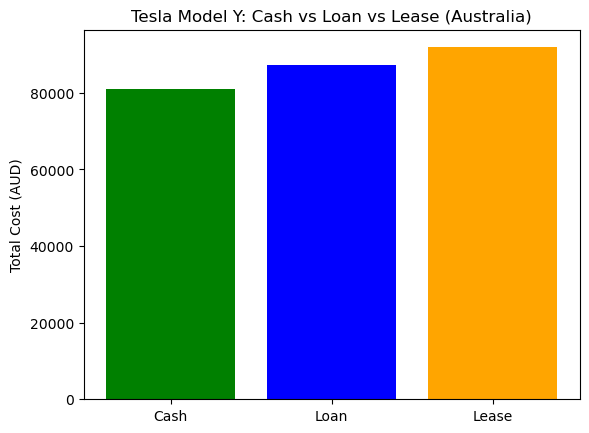

In [2]:
import matplotlib.pyplot as plt

# ==========================
# Tesla Model Y Lease 参数（来自你的图片）
# ==========================
car_price = 65772          # Driveaway price (AUD)
lease_years = 3            # Lease term (36 months)
lease_residual = 31065.62  # Residual value
lease_monthly_finance = 1258.66
lease_establish_fee = 5.74
ppsr_fee = 29.95 / (lease_years * 12)   # 把一次性 PPSR 平均到月供

# Running costs (monthly, from image)
fuel_charging = 37.06
maintenance = 45.71
tyres = 70.38
registration = 66.09
insurance = 204.29
running_monthly = fuel_charging + maintenance + tyres + registration + insurance

# Lease 总月供（含 finance + fees + running costs）
lease_monthly_total = lease_monthly_finance + lease_establish_fee + ppsr_fee + running_monthly
lease_total_cost = lease_monthly_total * lease_years * 12 + lease_residual   # 残值要考虑

# ==========================
# 假设的 Loan 参数（可以改）
# ==========================
loan_years = 3
loan_rate = 0.06  # 6% 年利率

def calc_loan_payment(principal, rate, years):
    monthly_rate = rate / 12
    n = years * 12
    monthly_payment = principal * (monthly_rate * (1 + monthly_rate)**n) / ((1 + monthly_rate)**n - 1)
    return monthly_payment

loan_monthly = calc_loan_payment(car_price, loan_rate, loan_years)
loan_total_cost = loan_monthly * loan_years * 12 + running_monthly * loan_years * 12

# ==========================
# 全款 (Cash)
# ==========================
cash_total_cost = car_price + running_monthly * lease_years * 12

# ==========================
# 打印结果
# ==========================
print("=== Tesla Model Y 三种买车方式对比 (AUD) ===")
print(f"全款购买: {cash_total_cost:,.0f}")
print(f"贷款 ({loan_years}年, {loan_rate*100:.1f}%): 每月 {loan_monthly:,.0f}, 总支出 {loan_total_cost:,.0f}")
print(f"Lease ({lease_years}年): 每月 {lease_monthly_total:,.0f}, 总支出 {lease_total_cost:,.0f}")

# ==========================
# 可视化
# ==========================
methods = ["Cash", "Loan", "Lease"]
totals = [cash_total_cost, loan_total_cost, lease_total_cost]

plt.bar(methods, totals, color=['green','blue','orange'])
plt.ylabel("Total Cost (AUD)")
plt.title("Tesla Model Y: Cash vs Loan vs Lease (Australia)")
plt.show()


=== Subaru Forester 三种买车方式对比 (AUD) ===
全款购买: 63,587
贷款 (3年, 6.0%): 每月 1,441, 总支出 68,096
Lease (3年): 每月 1,365, 总支出 71,491


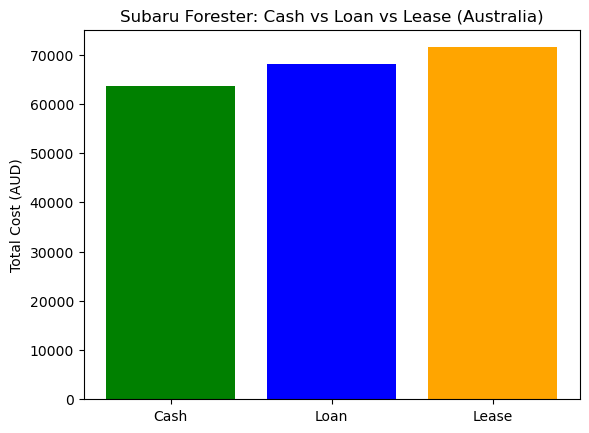

In [3]:
import matplotlib.pyplot as plt

# ==========================
# Subaru Forester Lease 参数
# ==========================
car_price = 47369.49
lease_years = 3
lease_residual = 22362.00
lease_monthly_finance = 907.63
lease_establish_fee = 5.74
ppsr_fee = 29.95 / (lease_years * 12)

# Running costs (monthly, from image)
fuel_charging = 139.42
maintenance = 49.73
tyres = 42.67
registration = 60.70
insurance = 157.96
running_monthly = fuel_charging + maintenance + tyres + registration + insurance

# Lease 总月供（含 finance + fees + running costs）
lease_monthly_total = lease_monthly_finance + lease_establish_fee + ppsr_fee + running_monthly
lease_total_cost = lease_monthly_total * lease_years * 12 + lease_residual

# ==========================
# 假设 Loan 参数
# ==========================
loan_years = 3
loan_rate = 0.06  # 6% 年利率

def calc_loan_payment(principal, rate, years):
    monthly_rate = rate / 12
    n = years * 12
    monthly_payment = principal * (monthly_rate * (1 + monthly_rate)**n) / ((1 + monthly_rate)**n - 1)
    return monthly_payment

loan_monthly = calc_loan_payment(car_price, loan_rate, loan_years)
loan_total_cost = loan_monthly * loan_years * 12 + running_monthly * loan_years * 12

# ==========================
# 全款 (Cash)
# ==========================
cash_total_cost = car_price + running_monthly * lease_years * 12

# ==========================
# 打印结果
# ==========================
print("=== Subaru Forester 三种买车方式对比 (AUD) ===")
print(f"全款购买: {cash_total_cost:,.0f}")
print(f"贷款 ({loan_years}年, {loan_rate*100:.1f}%): 每月 {loan_monthly:,.0f}, 总支出 {loan_total_cost:,.0f}")
print(f"Lease ({lease_years}年): 每月 {lease_monthly_total:,.0f}, 总支出 {lease_total_cost:,.0f}")

# ==========================
# 可视化
# ==========================
methods = ["Cash", "Loan", "Lease"]
totals = [cash_total_cost, loan_total_cost, lease_total_cost]

plt.bar(methods, totals, color=['green','blue','orange'])
plt.ylabel("Total Cost (AUD)")
plt.title("Subaru Forester: Cash vs Loan vs Lease (Australia)")
plt.show()


=== Tesla Model Y 总成本 (3年) ===
Cash: 81,019 | Loan: 87,280 | Lease: 91,861
=== Subaru Forester 总成本 (3年) ===
Cash: 63,587 | Loan: 68,096 | Lease: 71,491


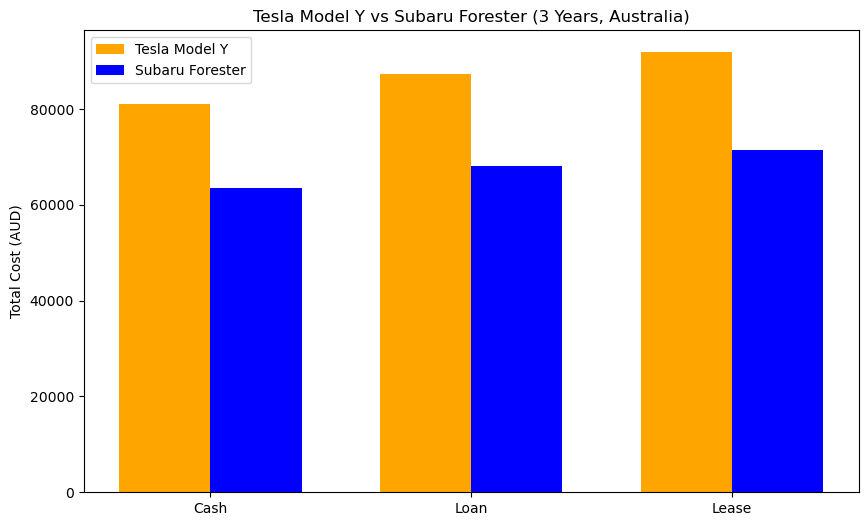

In [4]:
import matplotlib.pyplot as plt

# ==========================
# Tesla Model Y 参数
# ==========================
tesla_price = 65772
tesla_lease_years = 3
tesla_residual = 31065.62
tesla_finance_monthly = 1258.66
tesla_lease_fee = 5.74
tesla_ppsr = 29.95 / (tesla_lease_years * 12)

tesla_running_monthly = 37.06 + 45.71 + 70.38 + 66.09 + 204.29
tesla_lease_monthly_total = tesla_finance_monthly + tesla_lease_fee + tesla_ppsr + tesla_running_monthly
tesla_lease_total = tesla_lease_monthly_total * tesla_lease_years * 12 + tesla_residual

# ==========================
# Subaru Forester 参数
# ==========================
subaru_price = 47369.49
subaru_lease_years = 3
subaru_residual = 22362.00
subaru_finance_monthly = 907.63
subaru_lease_fee = 5.74
subaru_ppsr = 29.95 / (subaru_lease_years * 12)

subaru_running_monthly = 139.42 + 49.73 + 42.67 + 60.70 + 157.96
subaru_lease_monthly_total = subaru_finance_monthly + subaru_lease_fee + subaru_ppsr + subaru_running_monthly
subaru_lease_total = subaru_lease_monthly_total * subaru_lease_years * 12 + subaru_residual

# ==========================
# 假设 Loan 参数
# ==========================
loan_years = 3
loan_rate = 0.06  # 6%

def calc_loan_payment(principal, rate, years):
    monthly_rate = rate / 12
    n = years * 12
    return principal * (monthly_rate * (1 + monthly_rate)**n) / ((1 + monthly_rate)**n - 1)

# Tesla Loan
tesla_loan_monthly = calc_loan_payment(tesla_price, loan_rate, loan_years)
tesla_loan_total = tesla_loan_monthly * loan_years * 12 + tesla_running_monthly * loan_years * 12
tesla_cash_total = tesla_price + tesla_running_monthly * tesla_lease_years * 12

# Subaru Loan
subaru_loan_monthly = calc_loan_payment(subaru_price, loan_rate, loan_years)
subaru_loan_total = subaru_loan_monthly * loan_years * 12 + subaru_running_monthly * loan_years * 12
subaru_cash_total = subaru_price + subaru_running_monthly * subaru_lease_years * 12

# ==========================
# 打印结果
# ==========================
print("=== Tesla Model Y 总成本 (3年) ===")
print(f"Cash: {tesla_cash_total:,.0f} | Loan: {tesla_loan_total:,.0f} | Lease: {tesla_lease_total:,.0f}")
print("=== Subaru Forester 总成本 (3年) ===")
print(f"Cash: {subaru_cash_total:,.0f} | Loan: {subaru_loan_total:,.0f} | Lease: {subaru_lease_total:,.0f}")

# ==========================
# 可视化
# ==========================
labels = ["Cash", "Loan", "Lease"]
tesla_totals = [tesla_cash_total, tesla_loan_total, tesla_lease_total]
subaru_totals = [subaru_cash_total, subaru_loan_total, subaru_lease_total]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar([i - width/2 for i in x], tesla_totals, width=width, label="Tesla Model Y", color="orange")
plt.bar([i + width/2 for i in x], subaru_totals, width=width, label="Subaru Forester", color="blue")

plt.xticks(x, labels)
plt.ylabel("Total Cost (AUD)")
plt.title("Tesla Model Y vs Subaru Forester (3 Years, Australia)")
plt.legend()
plt.show()


=== Tesla Model Y 总成本 (3年) ===
Cash: 81,019 | Loan: 87,280 | Lease: 91,861
=== Subaru Forester 总成本 (3年) ===
Cash: 63,587 | Loan: 68,096 | Lease: 71,491


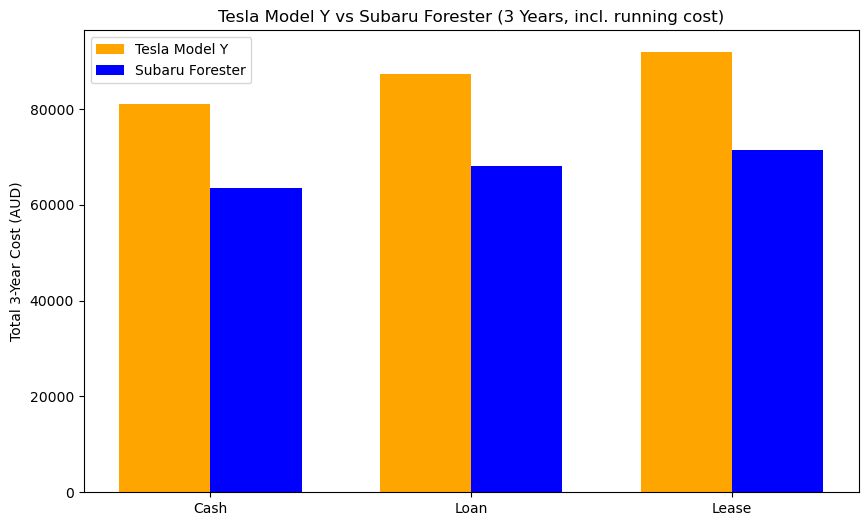

In [5]:
import matplotlib.pyplot as plt

# ==========================
# Tesla Model Y 参数
# ==========================
tesla_price = 65772
tesla_lease_years = 3
tesla_residual = 31065.62
tesla_finance_monthly = 1258.66
tesla_lease_fee = 5.74
tesla_ppsr = 29.95 / (tesla_lease_years * 12)

# 用车成本 (每月)
tesla_running_monthly = 37.06 + 45.71 + 70.38 + 66.09 + 204.29

# Lease 成本
tesla_lease_monthly_total = tesla_finance_monthly + tesla_lease_fee + tesla_ppsr + tesla_running_monthly
tesla_lease_total = tesla_lease_monthly_total * tesla_lease_years * 12 + tesla_residual

# ==========================
# Subaru Forester 参数
# ==========================
subaru_price = 47369.49
subaru_lease_years = 3
subaru_residual = 22362.00
subaru_finance_monthly = 907.63
subaru_lease_fee = 5.74
subaru_ppsr = 29.95 / (subaru_lease_years * 12)

# 用车成本 (每月)
subaru_running_monthly = 139.42 + 49.73 + 42.67 + 60.70 + 157.96

# Lease 成本
subaru_lease_monthly_total = subaru_finance_monthly + subaru_lease_fee + subaru_ppsr + subaru_running_monthly
subaru_lease_total = subaru_lease_monthly_total * subaru_lease_years * 12 + subaru_residual

# ==========================
# Loan 假设
# ==========================
loan_years = 3
loan_rate = 0.06  # 6%

def calc_loan_payment(principal, rate, years):
    monthly_rate = rate / 12
    n = years * 12
    return principal * (monthly_rate * (1 + monthly_rate)**n) / ((1 + monthly_rate)**n - 1)

# Tesla Loan
tesla_loan_monthly = calc_loan_payment(tesla_price, loan_rate, loan_years)
tesla_loan_total = tesla_loan_monthly * loan_years * 12 + tesla_running_monthly * loan_years * 12
tesla_cash_total = tesla_price + tesla_running_monthly * tesla_lease_years * 12

# Subaru Loan
subaru_loan_monthly = calc_loan_payment(subaru_price, loan_rate, loan_years)
subaru_loan_total = subaru_loan_monthly * loan_years * 12 + subaru_running_monthly * loan_years * 12
subaru_cash_total = subaru_price + subaru_running_monthly * subaru_lease_years * 12

# ==========================
# 打印结果
# ==========================
print("=== Tesla Model Y 总成本 (3年) ===")
print(f"Cash: {tesla_cash_total:,.0f} | Loan: {tesla_loan_total:,.0f} | Lease: {tesla_lease_total:,.0f}")
print("=== Subaru Forester 总成本 (3年) ===")
print(f"Cash: {subaru_cash_total:,.0f} | Loan: {subaru_loan_total:,.0f} | Lease: {subaru_lease_total:,.0f}")

# ==========================
# 可视化 (含用车成本)
# ==========================
labels = ["Cash", "Loan", "Lease"]
tesla_totals = [tesla_cash_total, tesla_loan_total, tesla_lease_total]
subaru_totals = [subaru_cash_total, subaru_loan_total, subaru_lease_total]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar([i - width/2 for i in x], tesla_totals, width=width, label="Tesla Model Y", color="orange")
plt.bar([i + width/2 for i in x], subaru_totals, width=width, label="Subaru Forester", color="blue")

plt.xticks(x, labels)
plt.ylabel("Total 3-Year Cost (AUD)")
plt.title("Tesla Model Y vs Subaru Forester (3 Years, incl. running cost)")
plt.legend()
plt.show()


Tesla Model Y 年电费: 450 AUD (≈ 37.5/月)
Subaru Forester 年油费: 1480 AUD (≈ 123.3/月)

=== Tesla Model Y 总成本 (3年, 含用车) ===
Cash: 81,035 | Lease: 91,877

=== Subaru Forester 总成本 (3年, 含用车) ===
Cash: 63,008 | Lease: 70,911


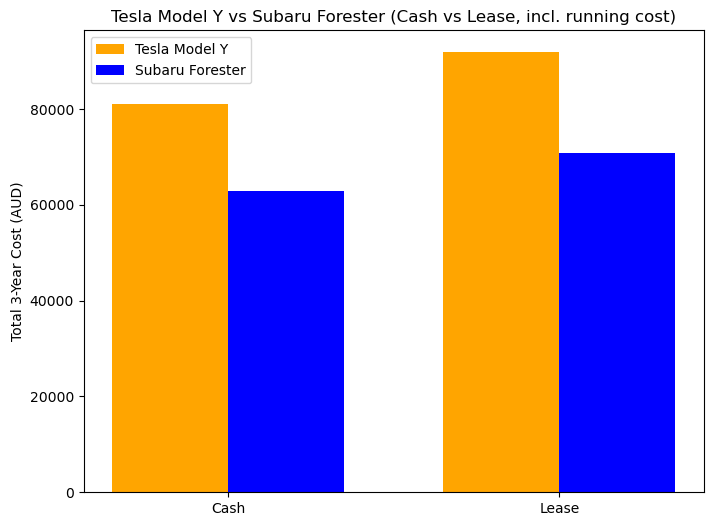

In [6]:
import matplotlib.pyplot as plt

# ==========================
# 基本假设
# ==========================
years = 3
annual_km = 10000

# 电价 & 油价
electricity_price = 0.30   # AUD/kWh
petrol_price = 1.85        # AUD/L

# 耗能
tesla_kwh_per_100km = 15
subaru_l_per_100km = 8

# 年度能耗费用
tesla_fuel_year = (annual_km/100) * tesla_kwh_per_100km * electricity_price
subaru_fuel_year = (annual_km/100) * subaru_l_per_100km * petrol_price

tesla_fuel_month = tesla_fuel_year / 12
subaru_fuel_month = subaru_fuel_year / 12

print(f"Tesla Model Y 年电费: {tesla_fuel_year:.0f} AUD (≈ {tesla_fuel_month:.1f}/月)")
print(f"Subaru Forester 年油费: {subaru_fuel_year:.0f} AUD (≈ {subaru_fuel_month:.1f}/月)")

# ==========================
# Tesla Model Y
# ==========================
tesla_price = 65772
tesla_residual = 31065.62
tesla_finance_monthly = 1258.66
tesla_lease_fee = 5.74
tesla_ppsr = 29.95 / (years * 12)

# 用车成本 (电费+保养+轮胎+注册+保险)
tesla_running_monthly = tesla_fuel_month + 45.71 + 70.38 + 66.09 + 204.29

# Cash 总成本
tesla_cash_total = tesla_price + tesla_running_monthly * years * 12

# Lease 总成本
tesla_lease_monthly_total = tesla_finance_monthly + tesla_lease_fee + tesla_ppsr + tesla_running_monthly
tesla_lease_total = tesla_lease_monthly_total * years * 12 + tesla_residual

# ==========================
# Subaru Forester
# ==========================
subaru_price = 47369.49
subaru_residual = 22362.00
subaru_finance_monthly = 907.63
subaru_lease_fee = 5.74
subaru_ppsr = 29.95 / (years * 12)

# 用车成本 (油费+保养+轮胎+注册+保险)
subaru_running_monthly = subaru_fuel_month + 49.73 + 42.67 + 60.70 + 157.96

# Cash 总成本
subaru_cash_total = subaru_price + subaru_running_monthly * years * 12

# Lease 总成本
subaru_lease_monthly_total = subaru_finance_monthly + subaru_lease_fee + subaru_ppsr + subaru_running_monthly
subaru_lease_total = subaru_lease_monthly_total * years * 12 + subaru_residual

# ==========================
# 打印结果
# ==========================
print("\n=== Tesla Model Y 总成本 (3年, 含用车) ===")
print(f"Cash: {tesla_cash_total:,.0f} | Lease: {tesla_lease_total:,.0f}")

print("\n=== Subaru Forester 总成本 (3年, 含用车) ===")
print(f"Cash: {subaru_cash_total:,.0f} | Lease: {subaru_lease_total:,.0f}")

# ==========================
# 可视化
# ==========================
labels = ["Cash", "Lease"]
tesla_totals = [tesla_cash_total, tesla_lease_total]
subaru_totals = [subaru_cash_total, subaru_lease_total]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar([i - width/2 for i in x], tesla_totals, width=width, label="Tesla Model Y", color="orange")
plt.bar([i + width/2 for i in x], subaru_totals, width=width, label="Subaru Forester", color="blue")

plt.xticks(x, labels)
plt.ylabel("Total 3-Year Cost (AUD)")
plt.title("Tesla Model Y vs Subaru Forester (Cash vs Lease, incl. running cost)")
plt.legend()
plt.show()


=== Tesla Model Y (3年, 含用车) ===
Cash: 81,035 | Lease (免FBT): 91,877
=== Subaru Forester (3年, 含用车) ===
Cash: 63,008 | Lease (+FBT): 80,385


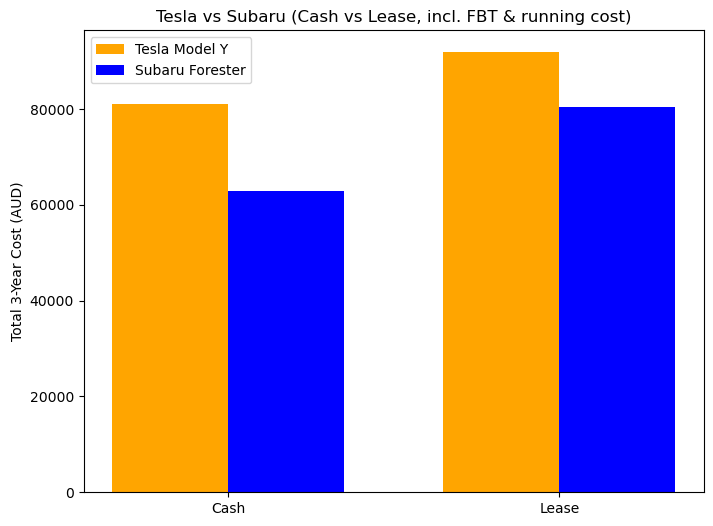

In [7]:
import matplotlib.pyplot as plt

years = 3
annual_km = 10000

# 油电价格
electricity_price = 0.30
petrol_price = 1.85

# 耗能
tesla_kwh_per_100km = 15
subaru_l_per_100km = 8

# 年油/电费
tesla_fuel_year = (annual_km/100) * tesla_kwh_per_100km * electricity_price
subaru_fuel_year = (annual_km/100) * subaru_l_per_100km * petrol_price

tesla_fuel_month = tesla_fuel_year / 12
subaru_fuel_month = subaru_fuel_year / 12

# Tesla
tesla_price = 65772
tesla_residual = 31065.62
tesla_finance_monthly = 1258.66
tesla_lease_fee = 5.74
tesla_ppsr = 29.95 / (years * 12)

tesla_running_monthly = tesla_fuel_month + 45.71 + 70.38 + 66.09 + 204.29

tesla_cash_total = tesla_price + tesla_running_monthly * years * 12
tesla_lease_monthly_total = tesla_finance_monthly + tesla_lease_fee + tesla_ppsr + tesla_running_monthly
tesla_lease_total = tesla_lease_monthly_total * years * 12 + tesla_residual   # ⚡ 电车免 FBT

# Subaru
subaru_price = 47369.49
subaru_residual = 22362.00
subaru_finance_monthly = 907.63
subaru_lease_fee = 5.74
subaru_ppsr = 29.95 / (years * 12)

subaru_running_monthly = subaru_fuel_month + 49.73 + 42.67 + 60.70 + 157.96

subaru_cash_total = subaru_price + subaru_running_monthly * years * 12
subaru_lease_monthly_total = subaru_finance_monthly + subaru_lease_fee + subaru_ppsr + subaru_running_monthly
subaru_lease_total = subaru_lease_monthly_total * years * 12 + subaru_residual

# 加上 FBT 成本 (假设 20% 基础税，简化处理)
fbt_rate = 0.20
subaru_fbt_cost = subaru_price * fbt_rate   # 三年总额
subaru_lease_total += subaru_fbt_cost

# 输出
print("=== Tesla Model Y (3年, 含用车) ===")
print(f"Cash: {tesla_cash_total:,.0f} | Lease (免FBT): {tesla_lease_total:,.0f}")
print("=== Subaru Forester (3年, 含用车) ===")
print(f"Cash: {subaru_cash_total:,.0f} | Lease (+FBT): {subaru_lease_total:,.0f}")

# 可视化
labels = ["Cash", "Lease"]
tesla_totals = [tesla_cash_total, tesla_lease_total]
subaru_totals = [subaru_cash_total, subaru_lease_total]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar([i - width/2 for i in x], tesla_totals, width=width, label="Tesla Model Y", color="orange")
plt.bar([i + width/2 for i in x], subaru_totals, width=width, label="Subaru Forester", color="blue")

plt.xticks(x, labels)
plt.ylabel("Total 3-Year Cost (AUD)")
plt.title("Tesla vs Subaru (Cash vs Lease, incl. FBT & running cost)")
plt.legend()
plt.show()
